In [1]:
import h5py
import numpy as np
import os
from tqdm import tqdm
import illustris_python as il
import matplotlib.pyplot as plt
import multiprocessing as mp

basePath = './sims.TNG/TNG100-1/output'
hdf5_File_Path = './APMS_TNG100_hdf5_z12'
hdf5_files = [f for f in os.listdir(hdf5_File_Path) if f.endswith('.hdf5')]
with h5py.File(os.path.join(hdf5_File_Path, hdf5_files[0]), 'r') as file:
    # 获取文件中的 keys
    hdf5_keys = list(file.keys())

In [2]:
def Extremum_Num(Input_Array):
    maximum_index = list()
    minimum_index = list()
    for i in range(1, Input_Array.shape[0]-1):
        if Input_Array[i] > Input_Array[i-1] and Input_Array[i] > Input_Array[i+1]:
            maximum_index.append(i)
        elif Input_Array[i] < Input_Array[i-1] and Input_Array[i] < Input_Array[i+1]:
            minimum_index.append(i)
        elif np.isnan(Input_Array[i]):
            if (i >= 2) & i <= Input_Array.shape[0]-3:
                left_index = i-1
                while (1):
                    if np.isnan(Input_Array[left_index]):
                        left_index -= 1
                    else:
                        break
                right_index = i+1
                while (1):
                    if np.isnan(Input_Array[right_index]):
                        right_index += 1
                    else:
                        break
                if (left_index < 1):
                    left_index = 1
                if (right_index > Input_Array.shape[0]-2):
                    right_index = Input_Array.shape[0]-2

                left_difference = Input_Array[left_index] - \
                    Input_Array[left_index-1]
                right_difference = Input_Array[right_index] - \
                    Input_Array[right_index+1]
                if left_difference > 0 and right_difference > 0:
                    maximum_index.append(i)
                elif left_difference < 0 and right_difference < 0:
                    minimum_index.append(i)
                else:
                    continue

    return np.array(maximum_index), np.array(minimum_index)

In [3]:
first_infall_indices = list()
first_approach_indices = list()

for key in hdf5_keys:
    globals()[key] = list()

for file_name in tqdm(hdf5_files):
    with h5py.File(os.path.join(hdf5_File_Path, file_name), "r") as f:
        for key in hdf5_keys:
            globals()[key].append(f[key][()])
        init_subindex = np.where(f['Snapshots'][()] == 40)[0][0]
        distance = np.sqrt(
            np.sum(f['Modified_Difference'][()]**2, axis=1))[init_subindex:]
        max_indices, min_indices = Extremum_Num(distance)

        global_max = np.nanargmax(distance[init_subindex:])
        global_min = np.nanargmin(distance[init_subindex:])

        change = distance[global_max]-distance[global_min]
        ratio = 0.08
        change_limit = (change*ratio)

        extreme_indices = np.sort(np.concatenate((max_indices, min_indices)))
        to_del = list()
        skip = False
        for i in range(0, extreme_indices.shape[0]-1):
            if skip:
                skip = False
                continue
            if abs(distance[extreme_indices[i+1]]-distance[extreme_indices[i]]) < change_limit:
                to_del.append(i)
                to_del.append(i+1)
                skip = True
        extreme_indices = np.delete(extreme_indices, to_del).astype(int)
        if (len(extreme_indices) < 2) & (distance[-1] > distance[-2]):
            halo_index = file_name[5:9]

            if halo_index[-1] == '.':
                halo_index = halo_index[:-1]
            halo_index = int(halo_index)
            first_infall_indices.append(halo_index)
        if (len(extreme_indices) < 1) & (distance[-1] < distance[-2]):
            halo_index = file_name[5:9]
            if halo_index[-1] == '.':
                halo_index = halo_index[:-1]
            halo_index = int(halo_index)
            first_approach_indices.append(halo_index)
    # plt.scatter(f['Snapshots'][()][global_max],np.sqrt(np.sum(f['Modified_Difference'][()][global_max]**2)),c='r')
    # plt.scatter(f['Snapshots'][()][global_min],np.sqrt(np.sum(f['Modified_Difference'][()][global_min]**2)),c='b')
print(len(first_infall_indices))
print(len(first_approach_indices))

100%|██████████| 4396/4396 [00:45<00:00, 97.29it/s] 

234
100


In [ ]:
for key in hdf5_keys:
    globals()['first_infall_'+key] = list()
    globals()['first_approach_'+key] = list()
for index in tqdm(first_infall_indices):
    file_name = 'Halo-'+str(index)+'.hdf5'
    with h5py.File(os.path.join(hdf5_File_Path, file_name), "r") as f:
        for key in hdf5_keys:
            globals()['first_infall_'+key].append(f[key][()])
for index in tqdm(first_approach_indices):
    file_name = 'Halo-'+str(index)+'.hdf5'
    with h5py.File(os.path.join(hdf5_File_Path, file_name), "r") as f:
        for key in hdf5_keys:
            globals()['first_approach_'+key].append(f[key][()])

In [5]:
first_infall_indices_02 = list()
first_approach_indices_02 = list()

for key in hdf5_keys:
    globals()[key] = list()

for file_name in tqdm(hdf5_files):
    with h5py.File(os.path.join(hdf5_File_Path, file_name), "r") as f:
        for key in hdf5_keys:
            globals()[key].append(f[key][()])
        init_subindex = np.where(f['Snapshots'][()] == 40)[0][0]
        distance = np.sqrt(
            np.sum(f['Modified_Difference'][()]**2, axis=1))[init_subindex:]
        max_indices, min_indices = Extremum_Num(distance)

        global_max = np.nanargmax(distance[init_subindex:])
        global_min = np.nanargmin(distance[init_subindex:])

        change = distance[global_max]-distance[global_min]
        ratio = 0.2
        change_limit = (change*ratio)

        extreme_indices = np.sort(np.concatenate((max_indices, min_indices)))
        to_del = list()
        skip = False
        for i in range(0, extreme_indices.shape[0]-1):
            if skip:
                skip = False
                continue
            if abs(distance[extreme_indices[i+1]]-distance[extreme_indices[i]]) < change_limit:
                to_del.append(i)
                to_del.append(i+1)
                skip = True
        extreme_indices = np.delete(extreme_indices, to_del).astype(int)
        if (len(extreme_indices) < 2) & (distance[-1] > distance[-2]):
            halo_index = file_name[5:9]

            if halo_index[-1] == '.':
                halo_index = halo_index[:-1]
            halo_index = int(halo_index)
            first_infall_indices_02.append(halo_index)
        if (len(extreme_indices) < 1) & (distance[-1] < distance[-2]):
            halo_index = file_name[5:9]
            if halo_index[-1] == '.':
                halo_index = halo_index[:-1]
            halo_index = int(halo_index)
            first_approach_indices_02.append(halo_index)
    # plt.scatter(f['Snapshots'][()][global_max],np.sqrt(np.sum(f['Modified_Difference'][()][global_max]**2)),c='r')
    # plt.scatter(f['Snapshots'][()][global_min],np.sqrt(np.sum(f['Modified_Difference'][()][global_min]**2)),c='b')
print(len(first_infall_indices_02))
print(len(first_approach_indices_02))

100%|██████████| 4396/4396 [00:27<00:00, 159.86it/s]

265
138


In [7]:
for key in hdf5_keys:
    globals()['first_infall_02_'+key] = list()
    globals()['first_approach_02_'+key] = list()
for index in tqdm(first_infall_indices_02):
    file_name = 'Halo-'+str(index)+'.hdf5'
    with h5py.File(os.path.join(hdf5_File_Path, file_name), "r") as f:
        for key in hdf5_keys:
            globals()['first_infall_02_'+key].append(f[key][()])
for index in tqdm(first_approach_indices_02):
    file_name = 'Halo-'+str(index)+'.hdf5'
    with h5py.File(os.path.join(hdf5_File_Path, file_name), "r") as f:
        for key in hdf5_keys:
            globals()['first_approach_02_'+key].append(f[key][()])

100%|██████████| 138/138 [00:00<00:00, 222.68it/s]


In [8]:
for key in hdf5_keys:
    globals()['first_infall_'+key] = np.array(globals()['first_infall_'+key])
    globals()['first_approach_'+key] = np.array(globals()
                                                ['first_approach_'+key])
    globals()[key] = np.array(globals()[key])

In [11]:
for key in hdf5_keys:
    globals()['first_infall_02_'+key] = np.array(globals()['first_infall_02_'+key])
    globals()['first_approach_02_'+key] = np.array(globals()
                                                ['first_approach_02_'+key])

In [12]:
from scipy.stats import ks_2samp

In [7]:
hdf5_keys

['Distance',
 'Halo_Index',
 'Halo_Index_0',
 'Host_Index',
 'Host_Index_0',
 'Host_Mass',
 'Host_MassType',
 'Host_Position',
 'Host_Velocity',
 'MMSG_Index',
 'MMSG_Index_0',
 'MMSG_Mass',
 'MMSG_MassType',
 'MMSG_Position',
 'MMSG_Velocity',
 'Modified_Difference',
 'Radial_Velocity',
 'Snapshots',
 'Virial_Radius']

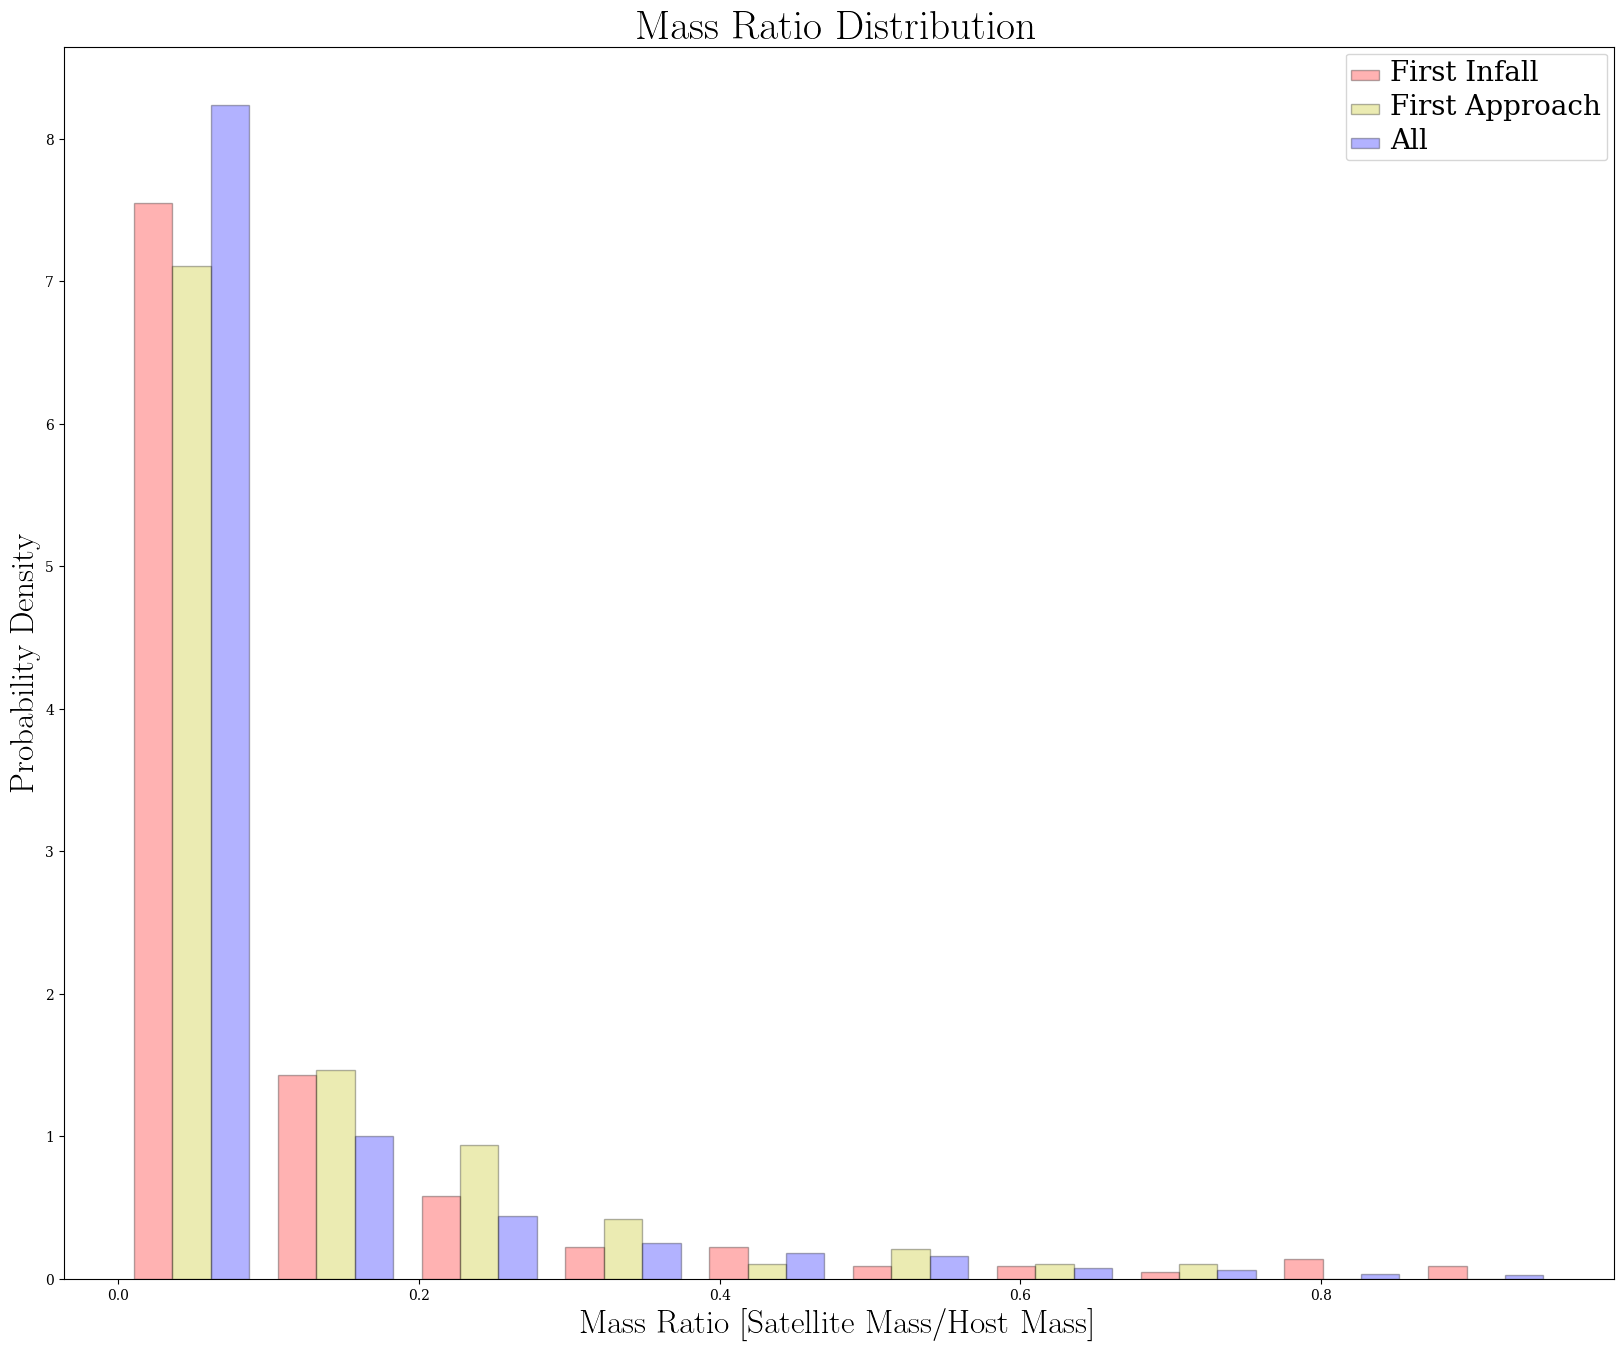

In [115]:
bins = 10
plt.figure(figsize=(20, 16))
plt.hist([first_infall_MMSG_Mass[:, -1]/first_infall_Host_Mass[:, -1], first_approach_MMSG_Mass[:, -1]/first_approach_Host_Mass[:, -1], MMSG_Mass[:, -1] /
         Host_Mass[:, -1]], bins=bins, label=['First Infall', 'First Approach', 'All'], density=True, alpha=0.3, color=['r', 'y', 'b'], edgecolor='black')
plt.title('Mass Ratio Distribution', usetex=True, fontsize=30)
plt.xlabel('Mass Ratio [Satellite Mass/Host Mass]', usetex=True, fontsize=24)
plt.ylabel('Probability Density', usetex=True, fontsize=24)
plt.legend()
for legend in plt.legend().get_texts():
    legend.set_fontsize(20)
    legend.set_color('black')
    legend.usetex = True

In [125]:
print('First Infall Host Mass Ratio KS Test ', end='')
print(f'[stat={ks_2samp(first_infall_Host_Mass[:,-1],Host_Mass[:,-1])[0]}],[p={ks_2samp(first_infall_Host_Mass[:,-1],Host_Mass[:,-1])[1]}]')
print('First Approach Host Mass Ratio KS Test ', end='')
print(f'[stat={ks_2samp(first_approach_Host_Mass[:,-1],Host_Mass[:,-1])[0]}],[p={ks_2samp(first_approach_Host_Mass[:,-1],Host_Mass[:,-1])[1]}]')

print('First Infall MMSG Mass KS Test ', end='')
print(f'[stat={ks_2samp(first_infall_MMSG_Mass[:,-1],MMSG_Mass[:,-1])[0]}],[p={ks_2samp(first_infall_MMSG_Mass[:,-1],MMSG_Mass[:,-1])[1]}]')
print('First Approach MMSG Mass KS Test ', end='')
print(f'[stat={ks_2samp(first_approach_MMSG_Mass[:,-1],MMSG_Mass[:,-1])[0]}],[p={ks_2samp(first_approach_MMSG_Mass[:,-1],MMSG_Mass[:,-1])[1]}]')

print('First Infall Mass Ratio KS Test ', end='')
print(f'[stat={ks_2samp(first_infall_MMSG_Mass[:,-1]/first_infall_Host_Mass[:,-1],MMSG_Mass[:,-1]/Host_Mass[:,-1])[0]}],[p={ks_2samp(first_infall_MMSG_Mass[:,-1]/first_infall_Host_Mass[:,-1],MMSG_Mass[:,-1]/Host_Mass[:,-1])[1]}]')
print('First Approach Mass Ratio KS Test ', end='')
print(f'[stat={ks_2samp(first_approach_MMSG_Mass[:,-1]/first_approach_Host_Mass[:,-1],MMSG_Mass[:,-1]/Host_Mass[:,-1])[0]}],[p={ks_2samp(first_approach_MMSG_Mass[:,-1]/first_approach_Host_Mass[:,-1],MMSG_Mass[:,-1]/Host_Mass[:,-1])[1]}]')

First Infall Host Mass Ratio KS Test [stat=0.06593212166460574],[p=0.2760887839247301]
First Approach Host Mass Ratio KS Test [stat=0.0970154686078253],[p=0.29636900112931774]
First Infall MMSG Mass KS Test [stat=0.12217983714799001],[p=0.002381092230812639]
First Approach MMSG Mass KS Test [stat=0.16550500454959052],[p=0.008257615167646504]
First Infall Mass Ratio KS Test [stat=0.136120249177574],[p=0.0004713459801730008]
First Approach Mass Ratio KS Test [stat=0.18708826205641493],[p=0.0018052290792944258]


In [ ]:
print('First Infall vs First Approach Host Mass ', end='')
print(f'[stat={ks_2samp(first_infall_Host_Mass[:,-1],first_approach_Host_Mass[:,-1])[0]}],[p={ks_2samp(first_infall_Host_Mass[:,-1],first_approach_Host_Mass[:,-1])[1]}]')
print('First Infall vs First Approach MMSG Mass ', end='')
print(f'[stat={ks_2samp(first_infall_MMSG_Mass[:,-1],first_approach_MMSG_Mass[:,-1])[0]}],[p={ks_2samp(first_infall_MMSG_Mass[:,-1],first_approach_MMSG_Mass[:,-1])[1]}]')
print('First Infall vs First Approach Mass Ratio ', end='')
print(f'[stat={ks_2samp(first_infall_MMSG_Mass[:,-1]/first_infall_Host_Mass[:,-1],first_approach_MMSG_Mass[:,-1]/first_approach_Host_Mass[:,-1])[0]}],[p={ks_2samp(first_infall_MMSG_Mass[:,-1]/first_infall_Host_Mass[:,-1],first_approach_MMSG_Mass[:,-1]/first_approach_Host_Mass[:,-1])[1]}]')

: 

[stat=0.0758974358974359],[p=0.7797761655463683]


In [16]:
print(f'[stat={ks_2samp(first_approach_02_Host_Mass[:,-1],Host_Mass[:,-1])[0]}],[p={ks_2samp(first_approach_02_Host_Mass[:,-1],Host_Mass[:,-1])[1]}]')
print(f'[stat={ks_2samp(first_approach_02_MMSG_Mass[:,-1],MMSG_Mass[:,-1])[0]}],[p={ks_2samp(first_approach_02_MMSG_Mass[:,-1],MMSG_Mass[:,-1])[1]}]')

[stat=0.0711912014875183],[p=0.48387216965872]


[stat=0.17139758146404505],[p=0.0006595205175909961]
